# Homework 14 Solutions

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [65]:
dt = 1e-9
tfinal = 500e-6
N = int(tfinal/dt)
time = np.linspace(0,500e-6, N)
f = 25e6 # Frequency of the Radar
def ref_func(t):
    if 0 < t < 20e-6:
        return np.sin(2*np.pi*f*t)
    else:
        return 0
ref = []
for t in time:
    ref.append(ref_func(t))

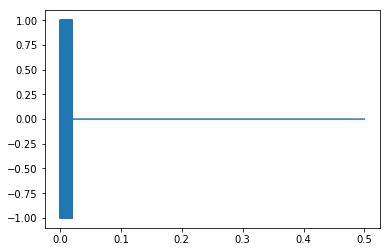

In [66]:
plt.plot(time/0.001,ref,)

In [67]:
echo = []
alpha = 0.05
Delta = 3e-4
for t in time:
    ech = alpha*ref_func(t-Delta) + np.random.normal(0,0.1)
    echo.append(ech)

In [68]:
fr = np.fft.fft(ref)/len(ref)
fe = np.fft.fft(echo)/len(ref)
nu = np.fft.fftfreq(len(time),time[1]-time[0])

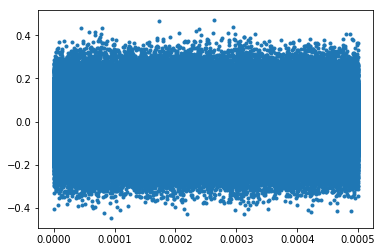

In [69]:
plt.plot(time, echo,'.')

In [70]:
data = {"t": time, "echo": echo}
df = pd.DataFrame(data)
df.to_csv('EchoData.csv')

In [71]:
frstar = np.conjugate(fr)
re = np.fft.ifft(frstar*fe)

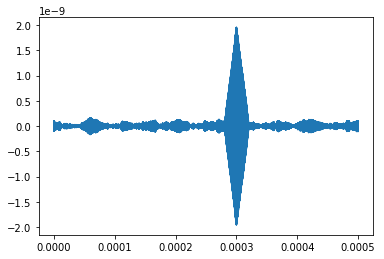

In [72]:
plt.plot(time, np.real(re))

0.0003333333333333333